# Complex Numbers & Mandelbrot Set

This notebook includes content originally licensed under the MIT License by [Meinard Müller, FAU](https://www.audiolabs-erlangen.de/fau/professor/mueller).
- Original Reference: https://www.audiolabs-erlangen.de/resources/MIR/PCP/PCP_06_complex.html <br>
- Original License: [MIT](https://opensource.org/licenses/MIT)


Modifications in this website licensed under [BSD 3-Clause License](https://github.com/wkCircle/notebooks_articles/blob/main/LICENSE).

Compared to original reference, I have deleted some codes and focus primarily on the Exercise 3 of Mandelbrot Set. 


In [1]:
import functools as ft
import numpy as np
from matplotlib import pyplot as plt

<a id='polar'></a> 
## Polar Representation

The **absolute value** (or **modulus**) of a complex number $a+ib$ is defined by

$$|c| := \sqrt{a^2 + b^2}.$$

The **angle** (given in radians) is given by 

$$\gamma := \mathrm{atan2}(b, a).$$

This yields a number in the interval $(-\pi,\pi]$, which can be mapped to $[0,2\pi)$ by adding $2\pi$ to negative values. The **angle** (given in degrees) is obtained by

$$360 \cdot \frac{\gamma}{2\pi}.$$

The complex number $c=a+ib$ is uniquely defined by the pair $(|c|, \gamma)$, which is also called the **polar representation** of $c$. One obtains the Cartesian representation $(a,b)$ from  the polar representation $(|c|,\gamma)$ as follows:

$$ a = |c| \cdot \cos(\gamma) $$
$$ b = |c| \cdot \sin(\gamma) $$

In the following code cell, we introduce some NumPy-functions for computing the absolute values and angle of a complex number.

In [2]:
a = 1.5
b = 0.8
c = a + b*1j
print('c  = ', c, ', type(c)  = ', type(c))
c2 = complex(a,b)
print('c2 = ', c2, ', type(c2) = ', type(c2))

c  =  (1.5+0.8j) , type(c)  =  <class 'complex'>
c2 =  (1.5+0.8j) , type(c2) =  <class 'complex'>


In [3]:
# example 
c = 1.5 + 0.8j
print('c = :', c)
print('Absolute value:', np.abs(c))
print('Angle (in radians):', np.angle(c))
print('Angle (in degree):', np.rad2deg(np.angle(c)))
print('Angle (in degree):', 180 * np.angle(c) / np.pi )
print(f'Cartesian representation: ({np.real(c)}, {np.imag(c)})') 
print(f'Polar representation: ({np.abs(c)}, {np.angle(c)})') 

c = : (1.5+0.8j)
Absolute value: 1.7
Angle (in radians): 0.48995732625372834
Angle (in degree): 28.07248693585296
Angle (in degree): 28.07248693585296
Cartesian representation: (1.5, 0.8)
Polar representation: (1.7, 0.48995732625372834)


For a non-zero complex number $c = a + bi$, there is an **inverse** complex number $c^{-1}$ with the property that $c\cdot c^{-1} = 1$. The inverse is given by:

$$c^{-1} := \frac{a}{a^2 + b^2} + i \frac{-b}{a^2 + b^2} = \frac{a}{|c|^2} + i \frac{-b}{|c|^2} = \frac{\overline{c}}{|c|^2}.$$

With the inverse, division can be defined:
    
$$\frac{c_1}{c_2} = c_1 c_2^{-1} = \frac{a_1 + ib_1}{a_2 + ib_2} := \frac{a_1a_2 + b_1b_2}{a_2^2 + b_2^2} + i\frac{b_1a_2 - a_1b_2}{a_2^2 + b_2^2} =  \frac{c_1\cdot \overline{c_2}}{|c_2|^2}.$$

<a id='polarplot'></a> 
## Polar Coordinate Plot

Finally, we show how complex vectors can be visualized in a polar coordinate plot. Also, the following code cell illustrates some functionalities of the Python libraries `numpy` and `matplotlib`.

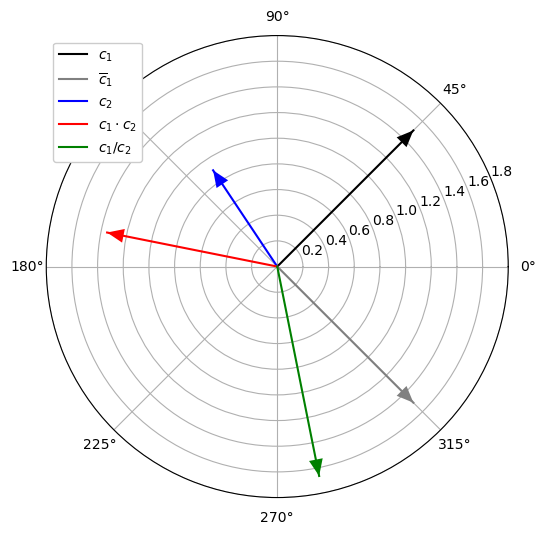

In [4]:
def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    """Plot arrow in polar plot

    Notebook: PCP_06_complex.ipynb

    Args:
        c: Complex number
        label: Label of arrow (Default value = None)
        color: Color of arrow (Default value = None)
        start: Complex number encoding the start position (Default value = 0)
        linestyle: Linestyle of arrow (Default value = '-')
    """
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label,
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none',
                                 headlength=12, headwidth=10, shrink=1, width=0))
    
c_abs = 1.5
c_angle = 45  # in degree
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs * np.cos(c_angle_rad)
b = c_abs * np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6, 6))
plot_polar_vector(c1, label=r'$c_1$', color='k')
plot_polar_vector(np.conj(c1), label=r'$\overline{c}_1$', color='gray')
plot_polar_vector(c2, label=r'$c_2$', color='b')
plot_polar_vector(c1*c2, label=r'$c_1\cdot c_2$', color='r')
plot_polar_vector(c1/c2, label=r'$c_1/c_2$', color='g')

plt.ylim([0, 1.8]);
plt.legend(framealpha=1);

## Exercises and Results

I find exercise 3 regarding Mandelbrot Set fascinating, and decide to focus only on it. The following (from original notebook) provides the video and and description of the Mandelbrot set.

Bascially, Mandelbrot set has a beautiful property that no mater from which given staring point that we decide to zoom in, we will find repeated patterns infinetly many times at the end.

<div class="alert alert-block alert-warning">
<strong>Note:</strong> As another application of complex numbers, we will consider in the next exercise a construction of a subset of complex numbers known as <a href="https://en.wikipedia.org/wiki/Mandelbrot_set">Mandelbrot set</a>. As noted at <a href="https://en.wikipedia.org/wiki/Mandelbrot_set">Wikipedia</a>, images of the Mandelbrot set exhibit an elaborate and infinitely complicated boundary that reveals progressively ever-finer recursive detail at increasing magnifications, making the boundary of the Mandelbrot set a <a href="https://en.wikipedia.org/wiki/Fractal_curve">fractal curve</a>. The Mandelbrot set has become popular outside mathematics both for its aesthetic appeal and as an example of a complex structure arising from applying simple rules. It is one of the best-known examples of mathematical visualization, mathematical beauty, and motif. In practice, one cannot easily compute the Mandelbrot set. Instead, one uses iterative algorithms based on heuristics to find an approximation of the Mandelbrot set, which can then be visualized as a subset of the complex plane. Often the boundary of the Mandelbrot set (the fractal curve) and its outer neighborhood are visualized with a color-coding that expresses divergence properties. This leads to the fascinating images of the Mandelbrot set you may have encountered. On the web, you can find numerous examples of how to approximate the Mandelbrot set and visualize it (e.g., also in an interactive fashion that allows you to zoom into the Mandelbrot set). In the following exercise, we will dive into this topic of fractals and their visualization. <strong>But be careful: You may become addicted and get lost in this topic. Don't forget to continue with the other units.</strong>            
</div>

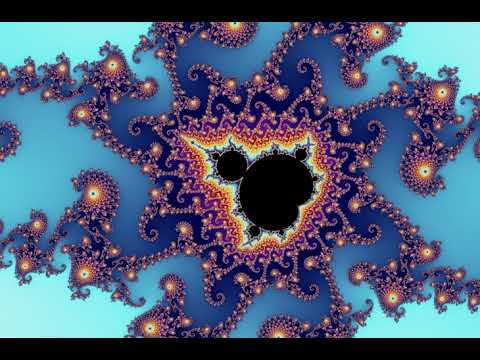

In [5]:
import IPython.display as ipd
ipd.display(ipd.YouTubeVideo('b005iHf8Z3g', width=600, height=450))

OK, let us start to do the exercise on how to plot this beautiful Mandelbrot Set.

<a id='exercise_mandelbrot'></a>
<div class="alert alert-block alert-info">
<strong>Exercise 3: Mandelbrot Set</strong><br>

Let $c\in\mathbb{C}$ be a complex number and $f_c:\mathbb{C}\to\mathbb{C}$ the function defined by $f_c(z)=z^2+c$ for $z\in\mathbb{C}$. Starting with $z=0$, we consider the iteration $v_c(0):=f_c(0)$ and $v_c(k) := f_c(v_c(k-1))$ for $k\in\mathbb{N}$. The Mandelbrot set is the set of complex numbers $c$ for which the series $(v_c(k))_{k\in\mathbb{N}}$ stays bounded (i.e., if there is a constant $\gamma_c$ such that $v_c(k)\leq \gamma_c$ for all $k\in\mathbb{N}$. Write a function that plots the Mandelbrot set in the Cartesian plane, where a number $c$ is colored black if it belongs to the Mandelbrot set and otherwise is colored white. 

1. Model the Mandelbrot set as a binary indicator function $\chi:\mathbb{C}\in\{0,1\}$, where $\chi(c)=1$ if $c$ belongs to the Mandelbrot set and $\chi(c)=0$ otherwise. 
2. Only consider complex numbers $c=a+ib$ on a discrete grid on a bounded range. It suffices to consider the range $a\in[-2,1]$ and $b\in[-1.2,1.2]$. Furthermore, for efficiency reasons, use a grid spacing that is not too fine. First, try out $\Delta a = \Delta b = 0.01$. To create the grid, you may use the function <code>np.meshgrid</code>.
3. Test for each $c=a+ib$ on that grid, if $(v_c(k))_{k\in\mathbb{N}}$ remains bounded or not. Computationally, this cannot be tested easily. However, usually, the sequence $(v_c(k))$ increases in an exponential fashion in the case that it is not bounded. Therefore, a pragmatic (yet not always correct) test is to fix a maximum number of iterations (e.g., $K = 50$) and a threshold (e.g., $L = 100$).
4. Plot $\chi$ using the function <code>plt.imshow</code>, use the colormap <code>'gray_r'</code>. Furthermore, use the parameter <code>extent</code> to adjust ranges of the horizontal axis $[-2,1]$ (real part) and vertical axis $[-1.2,1.2]$ (imaginary part).


A:

We will define some helpful functions, and then give some parameters as boundary and plot it.

In [6]:
@ft.lru_cache
def f(z: complex, c: complex) -> complex:
    """general function f, such that f_c(z) = f(z, c)"""
    try:
        return z**2 + c
    except OverflowError:
        return np.nan + np.nan * 1j

@ft.lru_cache
def v(k: int, c: complex) -> complex:
    r"""
    general recursive function v, such that
    v_c(k) = v(k, c) = f_c(v(k-1, c)) = f(v(k-1, c), c) for all k >= 1, and
    v_c(0) = f_c(0) = f(0, c).
    """
    assert k >= 0, "input k must be non-negative."
    return f(0, c) if k == 0 else f(v(k-1, c), c)


def approximator(c: complex, max_k: int = 50) -> complex:
    """use a max_k to approximate the final bounded value of the sequence {v_c(k)}"""
    return np.absolute(v(max_k, c))

def binary_indicator(c: complex, max_k: int = 50, threshold: float = 100) -> bool:
    r"""
    Indicator function that indicate if the series {v_c(k)} stays bounded, ie,
    belongs to Mandelbrot set (returns True) or not (returns False).
    
    There are rooms for better algorithm implementation since the current
    approach is only a simple approximation to determine is a series is bounded
    but not always correct compared to theory.

    Parameters
    ----------
        c (complex): a fixed complex number for the function v (and thus f).
        max_k (int): the max allowed k to be used to compute the series {v(k, c)}.
        threshold (float, >=0): 
          the customized bound ($\gamma_c$) to determine if the series {v(k, c)}
          where k=0, 1,... max_k, is bounded or not.
    """
    return approximator(c, max_k) <= threshold


In [7]:
from collections.abc import Iterable
def approx_binner(
    a: np.ndarray,
    pre_apply: callable = np.log2,
    bins: Iterable = range(-2, 308)
):
    """
    Helper function that clusters values of array `a` into different bins and
    returns the indices of the bins to which each value in input array belongs.

    Parameters
    ----------
    pre_apply : callable
        a function applied to input array before binning its values.
    bins : Iterable
        a 1-D list-like object that determins cutoff-point of bins.
    """
    return np.digitize(pre_apply(a), bins=bins)

C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\355208410.py:5: RuntimeWarning: overflow encountered in scalar power
  return z**2 + c
C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\355208410.py:5: RuntimeWarning: invalid value encountered in scalar power
  return z**2 + c
c:\Users\wkaic\miniconda3\envs\play312\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in binary_indicator (vectorized)
  outputs = ufunc(*inputs)
C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\1051244464.py:18: RuntimeWarning: divide by zero encountered in log2
  return np.digitize(pre_apply(a), bins=bins)


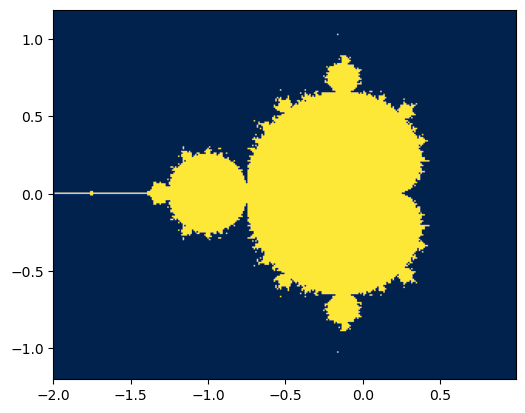

In [8]:
dist = 0.01
rr = np.arange(-2, 1, step=dist)
ii = np.arange(-1.2, 1.2, step=dist)
cc = np.meshgrid(rr, ii)
cc = np.vectorize(complex)(*cc)  # equivalent to cc[0] + cc[1] * 1j (which also supports spare=True in meshgrid)

# calculate result
zz = np.vectorize(binary_indicator)(cc)
zz_bin = approx_binner(zz)
# plot 
plt.imshow(zz_bin, extent=(rr[0], rr[-1], ii[0], ii[-1]), origin="lower", cmap="cividis")

C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\355208410.py:5: RuntimeWarning: overflow encountered in scalar power
  return z**2 + c
C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\355208410.py:5: RuntimeWarning: invalid value encountered in scalar power
  return z**2 + c


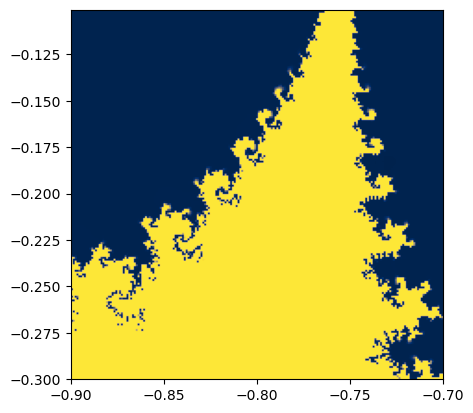

In [9]:
dist = 0.001
rr = np.arange(-0.9, -0.7, step=dist)
ii = np.arange(-0.3, -0.1, step=dist)
cc = np.meshgrid(rr, ii)
cc = np.vectorize(complex)(*cc)  # equivalent to cc[0] + cc[1] * 1j (which also supports spare=True in meshgrid)

# calculate result
zz = np.vectorize(approximator)(cc)
zz_bin = np.digitize(np.log10(zz), bins=range(-2, 308))
# plot 
plt.imshow(zz_bin, extent=(rr[0], rr[-1], ii[0], ii[-1]), origin="lower", cmap="cividis")

C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\355208410.py:5: RuntimeWarning: overflow encountered in scalar power
  return z**2 + c
C:\Users\wkaic\AppData\Local\Temp\ipykernel_35768\355208410.py:5: RuntimeWarning: invalid value encountered in scalar power
  return z**2 + c


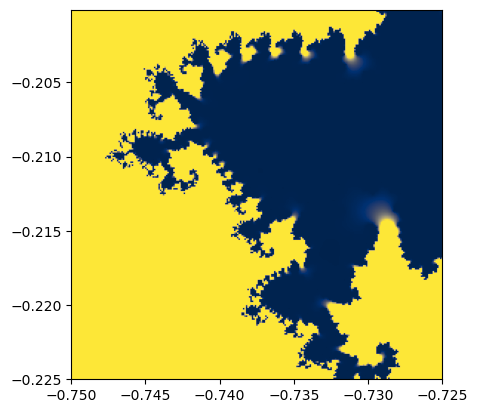

In [10]:
dist = 1e-4
rr = np.arange(-0.75, -0.725, step=dist)
ii = np.arange(-0.225, -0.2, step=dist)
cc = np.meshgrid(rr, ii)
cc = np.vectorize(complex)(*cc)  # equivalent to cc[0] + cc[1] * 1j (which also supports spare=True in meshgrid)

# calculate result
zz = np.vectorize(approximator)(cc)
zz_bin = np.digitize(np.log10(zz), bins=range(-2, 308))
# plot 
plt.imshow(zz_bin, extent=(rr[0], rr[-1], ii[0], ii[-1]), origin="lower", cmap="cividis")